In [0]:
# #colabを使う方はこちらを使用ください。
# !pip install torch==0.4.1
# !pip install torchvision==0.2.1

    100% |████████████████████████████████| 519.5MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59596000 @  0x7fa3468c52a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 5.1MB/s 
    100% |████████████████████████████████| 2.0MB 12.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# 損失関数と最適化関数

## 回帰問題と分類問題

In [0]:
#MSELoss
x = torch.randn(4)
y = torch.randn(4)
print(nn.MSELoss()(x, y))

tensor(1.3067)


In [0]:
#CrossEntropyLoss
x = torch.randn(1, 4)
y = torch.LongTensor([1]).random_(4)
print(nn.CrossEntropyLoss()(x, y))

tensor(0.6042)


## 色々な最適化関数

In [0]:
# 線形レイヤー
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #nn.Linear(入力次元、出力次元)
        self.lin1 = nn.Linear(in_features=10, out_features=10, bias=False)
    
    def forward(self, x):
        x = self.lin1(x)
        return x      

In [0]:
def main(opt_conf):
    loss_list = []
    # データ作成
    x = torch.randn(1, 10)
    w = torch.randn(1, 1)
    y = torch.mul(w, x) +2

    # ネットワーク定義
    net = Net()

    # 損失関数
    criterion = nn.MSELoss()
    # 最適化関数
    if opt_conf == "sgd":
        optimizer = optim.SGD(net.parameters(), lr=0.1)
    elif opt_conf == "momentum_sgd":
        optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
    elif opt_conf == "adadelta":
        optimizer = optim.Adadelta(net.parameters(), rho=0.95, eps=1e-04)
    elif opt_conf == "adagrad":
        optimizer = optim.Adagrad(net.parameters())
    elif opt_conf == "adam":
        optimizer = optim.Adam(net.parameters(), lr=1e-1, betas=(0.9, 0.99), eps=1e-09)
    elif opt_conf == "rmsprop":
        optimizer = optim.RMSprop(net.parameters())
    
    # 学習
    for epoch in range(20):
      optimizer.zero_grad()
      y_pred = net(x)

      loss = criterion(y_pred, y)
      loss.backward()

      optimizer.step()

      loss_list.append(loss.data.item())
    return loss_list

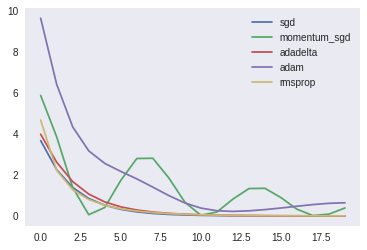

In [0]:
# 最適化関数
losss_dict = {}
losss_dict["sgd"] = []
losss_dict["momentum_sgd"] = []
losss_dict["adadelta"] = []
losss_dict["adam"] = []
losss_dict["rmsprop"] = []

for key, value in losss_dict.items():
    losss_dict[key] = main(key)

plt.figure()
plt.plot(losss_dict["sgd"], label='sgd')
plt.plot(losss_dict["momentum_sgd"], label='momentum_sgd')
plt.plot(losss_dict["adadelta"], label='adadelta')
plt.plot(losss_dict["adam"], label='adam')
plt.plot(losss_dict["rmsprop"], label='rmsprop')
plt.legend()
plt.grid()